In [1]:
import warnings
import mlbcolors
import pandas as pd
import altair as alt
import altair_latimes as lat

In [2]:
warnings.simplefilter("ignore")

In [3]:
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [4]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [5]:
df = pd.concat([pd.read_csv("./input/player_darviyu01_pitching_game_log_{}.csv".format(i)) for i in range(2012, 2020) if i != 2015])

In [6]:
df['dt'] = pd.to_datetime(df.date_game.apply(lambda x: x.split(".")[0]))

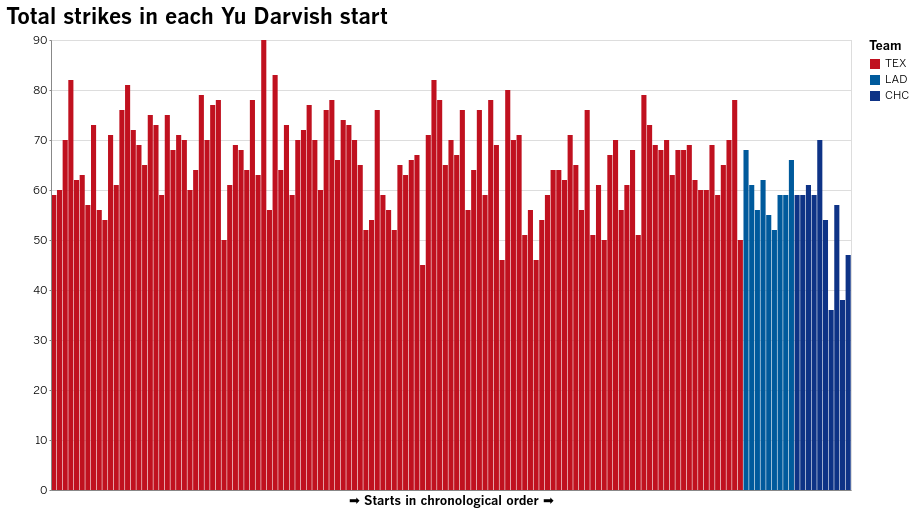

In [8]:
alt.Chart(df).mark_bar().encode(
    x=alt.X(
        "dt:O",
        title="➡️ Starts in chronological order ➡️",
        timeUnit="yearmonthdate",
        axis=alt.Axis(ticks=False, values=[]),
    ),
    y=alt.Y(
        "strikes_total:Q",
        title=""
    ),
    color=alt.Color(
        "team_ID:N",
        scale=alt.Scale(
            domain=["TEX", "LAD", "CHC"],
            range=['#C0111F', "#005A9C", "#0E3386"],
        ),
        legend=alt.Legend(
            title="Team",
        )
    )
).properties(
    width=800,
    title="Total strikes in each Yu Darvish start"
)